
# Sample code for evaluation of anipose calibrations

In [1]:
from b06_source.camera_calibration import CalibrationForAnipose3DTracking, SingleCamDataForAnipose, TestPositionsGroundTruth

from pathlib import Path
import matplotlib.pyplot as plt
from b06_source.load_config import read_config
# for creating an interactive 3D plot
#%matplotlib widget

In [2]:
dummy_filepath = Path('random.mp4')
intrinsic_calibrations_dir = Path('test_data/intrinsic_calibrations/')

### To switch between different calibrations, use one of the following paths:
- `'test_data/evaluate_calibration/calibration_00/'`
- `'test_data/evaluate_calibration/calibration_01/'`
- `'test_data/evaluate_calibration/calibration_02/'`

In [3]:
test_data_dir = Path('test_data/evaluate_calibration/calibration_02/')

## Create ground truth of test positions with real-world distances

In [4]:
config = read_config("config.yaml")

## Create individual camera objects with intrinsic calibrations & 2D coordinates of detected markers

In [5]:
top_cam = SingleCamDataForAnipose(cam_id = 'Top', filepath_synchronized_calibration_video = dummy_filepath)
top_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Top_manual_test_position_marker_fake.h5'))
top_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Top_checkerboard_intrinsic_calibration_results.p'))

bottom_cam = SingleCamDataForAnipose(cam_id = 'Bottom', filepath_synchronized_calibration_video = dummy_filepath)
bottom_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Bottom_manual_test_position_marker_fake.h5'))
bottom_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Bottom_checkerboard_intrinsic_calibration_results.p'))

side1_cam = SingleCamDataForAnipose(cam_id = 'Side1', filepath_synchronized_calibration_video = dummy_filepath)
side1_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Side1_manual_test_position_marker_fake.h5'))
side1_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Side1_checkerboard_intrinsic_calibration_results.p'))

side2_cam = SingleCamDataForAnipose(cam_id = 'Side2', filepath_synchronized_calibration_video = dummy_filepath)
side2_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Side2_manual_test_position_marker_fake.h5'))
side2_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Side2_checkerboard_intrinsic_calibration_results.p'))

ground1_cam = SingleCamDataForAnipose(cam_id = 'Ground1', filepath_synchronized_calibration_video = dummy_filepath)
ground1_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Ground1_manual_test_position_marker_fake.h5'))
ground1_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Ground1_checkerboard_intrinsic_calibration_results.p'))

ground2_cam = SingleCamDataForAnipose(cam_id = 'Ground2', filepath_synchronized_calibration_video = dummy_filepath)
ground2_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Ground2_manual_test_position_marker_fake.h5'))
ground2_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Ground2_checkerboard_intrinsic_calibration_results.p'))

single_cams = [bottom_cam, ground1_cam, ground2_cam, side1_cam, side2_cam, top_cam]

User info: since no other information were provided, "cropping_offsets" were set to the corresponding default values: (0, 0).
User info: since no other information were provided, "flipped_horizontally" & "flipped_vertically" were set to the corresponding default values: False.
User info: since no other information were provided, "degrees_rotated_clockwise" were set to the corresponding default values: 0.
User info: since no other information were provided, "cropping_offsets" were set to the corresponding default values: (0, 0).
User info: since no other information were provided, "flipped_horizontally" & "flipped_vertically" were set to the corresponding default values: False.
User info: since no other information were provided, "degrees_rotated_clockwise" were set to the corresponding default values: 0.
User info: since no other information were provided, "cropping_offsets" were set to the corresponding default values: (0, 0).
User info: since no other information were provided, "flip

## Load calibration, triangulate markers & plot

In [6]:
anipose_calibration = CalibrationForAnipose3DTracking(single_cams_to_calibrate = single_cams)

100%|█████████████████████████████████| 15/15 [00:01<00:00, 10.79it/s]


Mean reprojection error: 12.085031619303173
Using Screw1Bottom_Screw2Bottom as reference distance, the mean distance error is: 0.8965799333889779 cm.
Using Screw1Bottom_Screw1Top as reference distance, the mean distance error is: 0.6538318732038374 cm.
Using Screw1Bottom_Screw1Nut as reference distance, the mean distance error is: 0.7228164498277855 cm.
Using Screw1Bottom_Screw3Bottom as reference distance, the mean distance error is: 0.5258165214292603 cm.
Using Screw1Bottom_Screw4Bottom as reference distance, the mean distance error is: 0.7623583806918696 cm.
Using Screw2Bottom_Screw3Bottom as reference distance, the mean distance error is: 0.8992057778180506 cm.
Using Screw2Bottom_Screw4Bottom as reference distance, the mean distance error is: 1.536935544801745 cm.
Using Screw1Top_Screw1Bottom as reference distance, the mean distance error is: 0.6538318732038374 cm.
Using Screw1Top_Screw1Nut as reference distance, the mean distance error is: 2.3881148640399306 cm.
Using Screw1Top_Sc

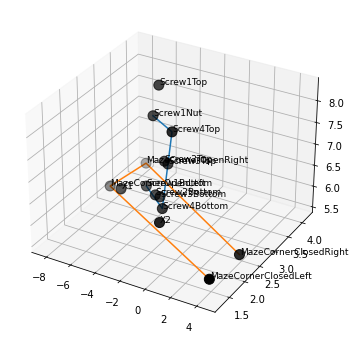

In [7]:
anipose_calibration.load_calibration(filepath = test_data_dir.joinpath('anipose_calibration_all_cams.toml'))
anipose_calibration.evaluate_triangulation_of_test_position_markers(config)

In [8]:
# additional function to check angles:
anipose_calibration.run_calibration_control()

KeyError: 'maze_corner_closed_left_x'

## Where you find the data:

### 1) x,y,z coordinates of triangulated markers in unitless space:

In [23]:
anipose_calibration.anipose_io['df_xyz']

,maze_corner_closed_left_x,maze_corner_closed_left_y,maze_corner_closed_left_z,maze_corner_closed_left_error,maze_corner_closed_left_score,maze_corner_closed_right_x,maze_corner_closed_right_y,maze_corner_closed_right_z,maze_corner_closed_right_error,maze_corner_closed_right_score,...,M_10,M_11,M_12,M_20,M_21,M_22,center_0,center_1,center_2,fnum
0,5.104463,-3.255364,65.362136,232.572065,0.999,6.627984,-1.301194,64.054527,216.467742,0.999,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


### 2) ground truth distances between markers in cm:

In [ ]:
test_positions.marker_ids_with_distances